In [1]:
from sklearn.model_selection import train_test_split
from utils import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


C:\Users\Hao Chen\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hao Chen\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Hao Chen\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Load data

In [2]:
bottleneck_folder = 'Bottleneck_data'
bottleneck_list = ['uo-180-070', 'uo-180-095', 'uo-180-120', 'uo-180-180']

corridor_folder = 'Corridor_data'
corridor_list = ['ug-180-015', 'ug-180-030', 'ug-180-060', 'ug-180-085', 'ug-180-095', 'ug-180-110', 'ug-180-140', 'ug-180-230']

In [3]:
bottleneck_dfs = Load_data([f"{bottleneck_folder}/{name}.txt" for name in bottleneck_list])
corridor_dfs = Load_data([f"{corridor_folder}/{name}.txt" for name in corridor_list])

In [4]:
#Show the trajectory of Bottleneck scenario
data = bottleneck_dfs[0]
# Call the function to run the visualization
visualize_trajectories_interactive(data)

In [5]:
#Show the trajectory of Corridor scenario
data = corridor_dfs[0]
# Call the function to run the visualization
visualize_trajectories_interactive(data)

In order to analyse the position of the pedestrians at a selected time frame, we transformed the 3D scenario into 2D.So that we can more intuitively analyze the sparse and density scenario.The following code want to plot a denstity scenario with Ring obstacle at time frame 850

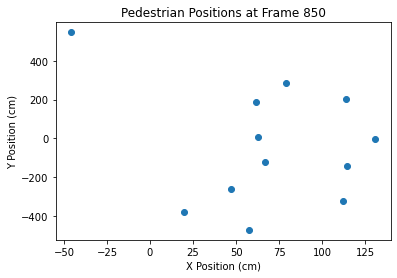

In [6]:
corridor_list_temp = ['ug-180-030']

corridor_dfs_temp = Load_data([f"{corridor_folder}/{name}.txt" for name in corridor_list_temp])

# Example usage: Plot pedestrian positions at frame XX for the bottleneck data
plot_pedestrian_positions(corridor_dfs_temp, 850)


# Data processing

## Combined bottleneck scenario

In [2]:
# Load the data and generate datasets for Bottleneck scenario
bottleneck_folder = 'Bottleneck_data'
bottleneck_list = ['uo-180-070', 'uo-180-095', 'uo-180-120', 'uo-180-180']
combined_B_dataset = pd.DataFrame()

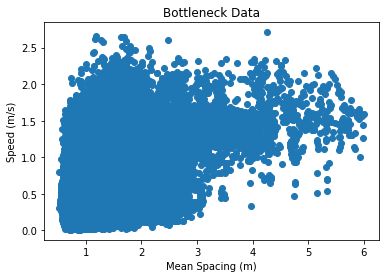

In [3]:
frame_rate = 1/16
measure_interval = 10  # Time interval in seconds for measuring mean spacing

for name in bottleneck_list:
    file_path = f"{bottleneck_folder}/{name}.txt"
    df = load_data(file_path)
    df = calculate_mean_spacing(df, frame_rate, measure_interval)
    df = calculate_speed(df, frame_rate)
    dataset = generate_dataset(df, name)
    combined_B_dataset = combined_B_dataset.append(dataset)

# Plotting mean spacing vs speed for the combined dataset
filtered_B_dataset = combined_B_dataset[combined_B_dataset['speed'] <= 400]  # Filter out data points with speed > 400 cm/s
filtered_B_dataset = filtered_B_dataset[filtered_B_dataset['mean_spacing'] <= 600]  # Filter out data points with mean spacing > 600 cm

# Convert mean spacing and speed to meters
filtered_B_dataset['mean_spacing'] /= 100  # Divide by 100 to convert cm to m
filtered_B_dataset['speed'] /= 100  # Divide by 100 to convert cm/s to m/s

plt.scatter(filtered_B_dataset['mean_spacing'], filtered_B_dataset['speed'])

plt.xlabel('Mean Spacing (m)')
plt.ylabel('Speed (m/s)')
plt.title('Bottleneck Data')
plt.show()


In [4]:
# Exporting the data to a CSV file
filtered_B_dataset.to_csv('B.csv', index=False)

In [5]:
# Reloading the data from the CSV file
filtered_B_dataset = pd.read_csv('B.csv')

## Combined corridor scenario

In [6]:
# Load the data and generate datasets for Corridor scenario
corridor_folder = 'Corridor_data'
corridor_list = ['ug-180-015', 'ug-180-030', 'ug-180-060', 'ug-180-085', 'ug-180-095', 'ug-180-110', 'ug-180-140', 'ug-180-230']
combined_R_dataset = pd.DataFrame()

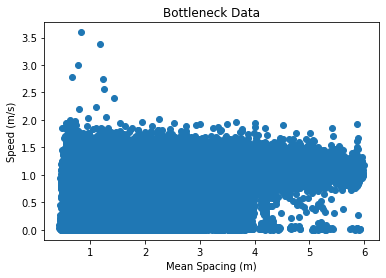

In [7]:
frame_rate = 1/16
measure_interval = 10  # Time interval in seconds for measuring mean spacing

for name in corridor_list:
    file_path = f"{corridor_folder}/{name}.txt"
    df = load_data(file_path)
    df = calculate_mean_spacing(df, frame_rate, measure_interval)
    df = calculate_speed(df, frame_rate)
    dataset = generate_dataset(df, name)
    combined_R_dataset = combined_R_dataset.append(dataset)

# Plotting mean spacing vs speed for the combined dataset
filtered_R_dataset = combined_R_dataset[combined_R_dataset['speed'] <= 400]  # Filter out data points with speed > 4 m/s
filtered_R_dataset = filtered_R_dataset[filtered_R_dataset['mean_spacing'] <= 600]  # Filter out data points with mean spacing > 600cm


filtered_R_dataset['mean_spacing']   /= 100  # Divide by 100 to convert cm to m
filtered_R_dataset['speed']  /= 100  # Divide by 100 to convert cm/s to m/s

plt.scatter(filtered_R_dataset['mean_spacing'], filtered_R_dataset['speed'])

plt.xlabel('Mean Spacing (m)')
plt.ylabel('Speed (m/s)')
plt.title('Bottleneck Data')
plt.show()


In [8]:
# Exporting the data to a CSV file
filtered_R_dataset.to_csv('R.csv', index=False)

In [47]:
# Reloading the data from the CSV file
filtered_R_dataset = pd.read_csv('R.csv')

# Weidmann model

In [9]:
# Bottleneck scenario
v0 = 1.58
l = 0.61
T = 0.48

x_data_bottleneck = filtered_B_dataset['mean_spacing']
y_data_bottleneck = filtered_B_dataset['speed']

x_curve_bottleneck = np.linspace(min(x_data_bottleneck), max(x_data_bottleneck), 100)
y_curve_bottleneck = weidmann_model(x_curve_bottleneck, v0, l, T)


In [10]:
# Ring scenario
v0_ring = 1.60
l_ring = 0.64
T_ring = 0.86

x_data_ring = filtered_R_dataset['mean_spacing']
y_data_ring = filtered_R_dataset['speed']

x_curve_ring = np.linspace(min(x_data_ring), max(x_data_ring), 100)
y_curve_ring = weidmann_model(x_curve_ring, v0_ring, l_ring, T_ring)

C:\Users\Hao Chen\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


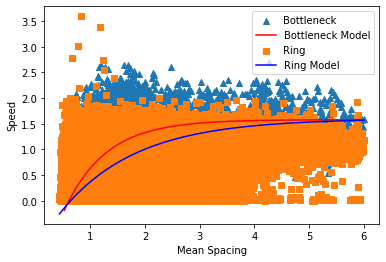

In [11]:
# Combine the figures
plt.scatter(x_data_bottleneck, y_data_bottleneck, marker='^', label='Bottleneck')
plt.plot(x_curve_bottleneck, y_curve_bottleneck, 'r', label='Bottleneck Model')

plt.scatter(x_data_ring, y_data_ring, marker='s', label='Ring')
plt.plot(x_curve_ring, y_curve_ring, 'b', label='Ring Model')

plt.xlabel('Mean Spacing')
plt.ylabel('Speed')
plt.legend()
plt.show()

# Calculate the MSE for different scenario

In [58]:
# Bottleneck scenario
v0_bottleneck = 1.58
l_bottleneck = 0.61
T_bottleneck = 0.48

x_data_bottleneck = result_B['mean_spacing']
y_data_bottleneck = result_B['speed']
popt_bottleneck, pcov_bottleneck = curve_fit(weidmann_model, x_data_bottleneck, y_data_bottleneck)
x_curve_bottleneck = np.linspace(min(x_data_bottleneck), max(x_data_bottleneck), 100)
y_curve_bottleneck = weidmann_model(x_curve_bottleneck, *popt_bottleneck)

# Ring scenario
v0_ring = 1.60
l_ring = 0.64
T_ring = 0.86

In [59]:
# Parameter sets
params = {
    "bottleneck": [v0, l, T],
    "ring": [v0_ring, l_ring, T_ring]
}

# Datasets
data_sets = {
    "bottleneck": [x_data_bottleneck, y_data_bottleneck],
    "ring": [x_data_ring, y_data_ring]
}

# Loop through each dataset
for data_key, data_value in data_sets.items():
    # Loop through each parameter set
    for params_key, params_value in params.items():
        # Calculate predictions and MSE
        y_pred = weidmann_model(data_value[0], *params_value)
        mse = mean_squared_error(data_value[1], y_pred)
        print(f"The Mean Squared Error (MSE) for the {data_key} scenario using the {params_key} parameters is: ", mse)

# Combined datasets
x_data_combined = pd.concat([x_data_bottleneck, x_data_ring])
y_data_combined = pd.concat([y_data_bottleneck, y_data_ring])

# Calculate the MSE for the combined scenario using each parameter set
for params_key, params_value in params.items():
    y_pred_combined = weidmann_model(x_data_combined, *params_value)
    mse_combined = mean_squared_error(y_data_combined, y_pred_combined)
    print(f"The Mean Squared Error (MSE) for the combined scenario using the {params_key} parameters is: ", mse_combined)

The Mean Squared Error (MSE) for the bottleneck scenario using the bottleneck parameters is:  0.12231189535395855
The Mean Squared Error (MSE) for the bottleneck scenario using the ring parameters is:  0.1618260444737865
The Mean Squared Error (MSE) for the ring scenario using the bottleneck parameters is:  0.22249652170499065
The Mean Squared Error (MSE) for the ring scenario using the ring parameters is:  0.11858063396546759
The Mean Squared Error (MSE) for the combined scenario using the bottleneck parameters is:  0.20001009498382386
The Mean Squared Error (MSE) for the combined scenario using the ring parameters is:  0.12828706088784603


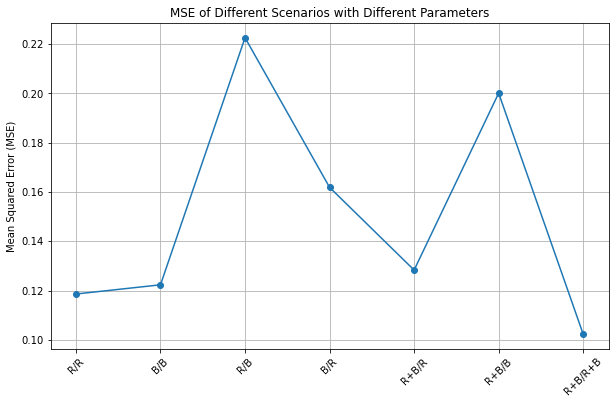

In [60]:
# Parameter sets
params = {
    "bottleneck": [v0, l, T],
    "ring": [v0_ring, l_ring, T_ring]
}

# Datasets
data_sets = {
    "bottleneck": [x_data_bottleneck, y_data_bottleneck],
    "ring": [x_data_ring, y_data_ring]
}

# Combined datasets
x_data_combined = pd.concat([x_data_bottleneck, x_data_ring])
y_data_combined = pd.concat([y_data_bottleneck, y_data_ring])

# Fit the combined data and get the parameters
popt_combined, pcov_combined = curve_fit(weidmann_model, x_data_combined, y_data_combined)

# Add the combined parameters to the params dictionary
params["combined"] = popt_combined

# Initialize a dictionary to store the MSE values
mse_values = {}

# Specify the order of the x-axis
x_order = ['R/R','B/B', 'R/B','B/R','R+B/R','R+B/B','R+B/R+B']

# Loop through each dataset
for data_key, data_value in data_sets.items():
    # Loop through each parameter set
    for params_key, params_value in params.items():
        # Calculate predictions and MSE
        y_pred = weidmann_model(data_value[0], *params_value)
        mse = mean_squared_error(data_value[1], y_pred)
        
        # If the data and the parameters are from the same scenario
        if data_key == params_key:
            mse_values[f'{data_key[0].upper()}/{params_key[0].upper()}'] = mse
        # If the data and the parameters are from different scenarios
        else:
            mse_values[f'{data_key[0].upper()}/{params_key[0].upper()}'] = mse

# Calculate the MSE for the combined scenario using each parameter set
for params_key, params_value in params.items():
    y_pred_combined = weidmann_model(x_data_combined, *params_value)
    mse_combined = mean_squared_error(y_data_combined, y_pred_combined)
    
    # If the parameters are from the combined scenario
    if params_key == "combined":
        mse_values['R+B/R+B'] = mse_combined
    # If the parameters are from a single scenario
    else:
        mse_values[f'R+B/{params_key[0].upper()}'] = mse_combined

# Arrange mse_values according to the specified order
mse_values_ordered = {key: mse_values[key] for key in x_order}

# Plot
plt.figure(figsize=(10, 6))
plt.plot(list(mse_values_ordered.keys()), list(mse_values_ordered.values()), marker='o')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('MSE of Different Scenarios with Different Parameters')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


# ANN

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [8]:
filtered_B_dataset

,id,frame,x,y,z,mean_spacing,x_neighbor,y_neighbor,speed,bottleneck
0,1,219,130.7710,772.562,155.467,4.029811,[116.807 145.778 66.7198 143.175 36.9...,[247.916 335.811 456.443 581.575 609.035 633.6...,2.344122,uo-180-070
1,1,220,132.5690,758.186,155.467,3.021100,[116.807 66.7198 36.5966 143.175 36.9...,[247.916 456.443 227.313 581.575 609.035 633.6...,2.318080,uo-180-070
2,1,221,134.6590,745.493,155.467,1.940468,[ 96.1438 36.9896 66.7198 9.20378 124.4...,[633.621 609.035 456.443 676.085 762.731 753.5...,2.058227,uo-180-070
3,1,222,134.8780,734.659,155.467,2.130530,[145.778 143.175 36.9896 96.1438 116.8...,[335.811 581.575 609.035 633.621 247.916 676.0...,1.733794,uo-180-070
4,1,223,133.4820,724.252,155.467,1.510734,[ 36.9896 143.175 9.20378 63.6129 124.4...,[609.035 581.575 676.085 753.578 762.731 785.5...,1.680034,uo-180-070
...,...,...,...,...,...,...,...,...,...,...
251214,218,487,42.7190,452.302,155.981,1.525232,[151.312 44.3314 51.6773 115.24 166.217 ...,[-397.72 -464.976 -318.654 -303.424 -501.745 ...,0.715022,uo-180-180
251215,218,488,40.7969,448.182,155.981,1.608167,[115.24 95.3049 67.8109 151.312 44.3314 ...,[-303.424 -395.161 -211.431 -397.72 -464.976 ...,0.727408,uo-180-180
251216,218,489,40.1999,442.457,155.981,1.644345,[ 51.6773 95.3049 151.312 67.8109 142.289 ...,[-318.654 -395.161 -397.72 -211.431 -194.629 ...,0.920967,uo-180-180
251217,218,490,40.7452,436.748,155.981,2.512119,[ 67.8109 115.24 51.6773 151.312 95.3049 ...,[-211.431 -303.424 -318.654 -397.72 -395.161 ...,0.917597,uo-180-180


In [13]:
filtered_R_dataset

,id,frame,x,y,z,mean_spacing,x_neighbor,y_neighbor,speed,bottleneck
1,1,1,125.144,115.317,166.284,5.215062,"[56.1702, -14.6551, 70.5286, 84.5574, 132.65, ...","[-333.451, -475.514, -184.205, -66.6471, 94.13...",0.011165,ug-180-030
2,1,2,125.438,115.181,166.284,4.452147,"[41.5915, 70.5286, -14.6551, 84.5574, 132.65, ...","[-409.036, -184.205, -475.514, -66.6471, 94.13...",0.051829,ug-180-030
3,1,3,125.457,115.163,166.284,3.422699,"[84.5574, 56.1702, 41.5915, 132.65, 57.5637, -...","[-66.6471, -333.451, -409.036, 94.1319, 103.32...",0.004188,ug-180-030
4,1,4,125.533,114.951,166.284,3.650382,"[70.5286, 132.65, 57.5637, 56.1702, 41.5915, 4...","[-184.205, 94.1319, 103.32, -333.451, -409.036...",0.036034,ug-180-030
5,1,5,125.660,114.903,166.284,3.536568,"[132.65, 84.5574, 49.6837, 118.391, 70.5286, -...","[94.1319, -66.6471, 307.923, 346.856, -184.205...",0.021723,ug-180-030
...,...,...,...,...,...,...,...,...,...,...
202929,233,2471,272.036,-672.506,188.168,0.687845,"[76.8282, 93.2481, 159.246, 34.9256, 108.348, ...","[-15.6095, -111.028, -64.522, -66.0741, 8.6985...",1.019557,ug-180-230
202930,233,2472,275.857,-677.610,188.168,0.928373,"[34.9256, 35.3737, 76.8282, 51.7583, 100.418, ...","[-66.0741, 0.67376, -15.6095, 40.1221, -57.607...",1.020128,ug-180-230
202931,233,2473,279.984,-682.188,188.168,0.953176,"[19.3954, 76.8282, 100.418, 35.3737, 93.2481, ...","[-35.8734, -15.6095, -57.607, 0.67376, -111.02...",0.986179,ug-180-230
202932,233,2474,284.961,-686.757,188.168,0.991861,"[100.418, 154.649, 34.9256, 159.246, 76.8282, ...","[-57.607, -107.349, -66.0741, -64.522, -15.609...",1.080993,ug-180-230


In [55]:
selected_columns = filtered_B_dataset.iloc[:, [2, 3, 6,7]]

# 创建一个新的DataFrame
B_Train = pd.DataFrame(selected_columns)
B_Train

IndexError: positional indexers are out-of-bounds

In [56]:
selected_columns = result_R.iloc[:, [2, 3, 6,7]]

# 创建一个新的DataFrame
R_Train = pd.DataFrame(selected_columns)
R_Train

IndexError: positional indexers are out-of-bounds

In [57]:
# 创建神经网络模型
class SpeedPredictionModel(nn.Module):
    def __init__(self, hidden_layers, hidden_nodes):
        super(SpeedPredictionModel, self).__init__()
        self.hidden_layers = hidden_layers
        self.hidden_nodes = hidden_nodes
        self.fc1 = nn.Linear(3, hidden_nodes[0])  # 输入层维度为3（x坐标，y坐标，平均密度sk）
        self.hidden = nn.ModuleList()
        for i in range(hidden_layers - 1):
            self.hidden.append(nn.Linear(hidden_nodes[i], hidden_nodes[i+1]))
        self.fc_out = nn.Linear(hidden_nodes[-1], 1)  # 输出维度为1

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        for hidden_layer in self.hidden:
            x = torch.relu(hidden_layer(x))
        x = self.fc_out(x)
        return x

# 创建训练数据
def create_train_data(df):
    # 将DataFrame转换为NumPy数组
    data = df.values
    inputs = data[:, :3]  # 取前3列作为输入（x坐标，y坐标，平均密度sk）
    targets = data[:, 3]  # 取第4列作为目标标签（速度v）

    # 转换为PyTorch的张量
    inputs = torch.Tensor(inputs)
    targets = torch.Tensor(targets)

    return inputs, targets

# 创建模型实例和损失函数
def create_model(hidden_layers, hidden_nodes):
    model = SpeedPredictionModel(hidden_layers, hidden_nodes)
    loss_function = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    return model, loss_function, optimizer

# 创建训练函数
def train_model(inputs, targets, model, optimizer, loss_function, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

    return losses

# 创建自助采样训练集
def create_bootstrap_dataset(inputs, targets, num_samples):
    indices = np.random.choice(len(inputs), size=num_samples, replace=True)
    bootstrap_inputs, bootstrap_targets = inputs[indices], targets[indices]
    return bootstrap_inputs, bootstrap_targets

# 创建交叉验证的训练和测试集
def create_cross_validation_datasets(inputs, targets, num_folds):
    kf = KFold(n_splits=num_folds, shuffle=True)
    train_datasets = []
    test_datasets = []
    for train_indices, test_indices in kf.split(inputs):
        train_inputs, train_targets = inputs[train_indices], targets[train_indices]
        test_inputs, test_targets = inputs[test_indices], targets[test_indices]
        train_datasets.append((train_inputs, train_targets))
        test_datasets.append((test_inputs, test_targets))
    return train_datasets, test_datasets

# 获取训练数据
inputs, targets = create_train_data(B_Train)

# 定义交叉验证和自助采样的参数
k_folds = 5
num_bootstrap_samples = 50
num_epochs = 100

# 创建不同配置的神经网络模型
hidden_layers_list = [1, 2, 3]  # 隐藏层层数的不同配置
hidden_nodes_list = [[64], [64, 32], [64, 32, 16]]  # 每个隐藏层的节点数的不同配置

# 存储每个配置下的损失值
all_losses = []

# 交叉验证和自助采样训练
for hidden_layers, hidden_nodes in zip(hidden_layers_list, hidden_nodes_list):
    print(f"Training with Hidden Layers: {hidden_layers}, Hidden Nodes: {hidden_nodes}")

    model_losses = []

    # 创建交叉验证的训练和测试集
    train_datasets, test_datasets = create_cross_validation_datasets(inputs, targets, k_folds)

    # 对每个折叠进行训练和测试
    for fold in range(k_folds):
        print(f"Fold: {fold+1}")

        train_inputs, train_targets = train_datasets[fold]
        test_inputs, test_targets = test_datasets[fold]

        # 创建神经网络模型和损失函数
        model, loss_function, optimizer = create_model(hidden_layers, hidden_nodes)

        # 自助采样训练数据
        bootstrap_inputs, bootstrap_targets = create_bootstrap_dataset(train_inputs, train_targets, num_bootstrap_samples)

        # 转换为PyTorch的张量
        bootstrap_inputs = torch.Tensor(bootstrap_inputs)
        bootstrap_targets = torch.Tensor(bootstrap_targets)
        test_inputs = torch.Tensor(test_inputs)
        test_targets = torch.Tensor(test_targets)

        # 进行训练
        losses = train_model(bootstrap_inputs, bootstrap_targets, model, optimizer, loss_function, num_epochs)
        model_losses.append(losses)

        # 使用测试集进行评估
        predictions = model(test_inputs)
        mse = loss_function(predictions.squeeze(), test_targets)
        print("Test MSE: {:.4f}".format(mse.item()))

    all_losses.append(model_losses)

# 绘制损失曲线
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i, model_losses in enumerate(all_losses):
    for j, losses in enumerate(model_losses):
        label = f"Model {i+1}, Fold {j+1}"
        plt.plot(range(num_epochs), losses, colors[i], label=label)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.